# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | kapa'a
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | pandan
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | st. john's
Processing Record 11 of Set 1 | port said
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | amungan
Processing Record 14 of Set 1 | sidney
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | aban
Processing Record 18 of Set 1 | takamaka
City not found. Skipping...
Processing Record 19 of Set 1 | wynyard
Processing Record 20 of Set 1 | taoudenni
Processing Record 21 of Set 1 | balqash
Processing Recor

Processing Record 37 of Set 4 | vilyuysk
Processing Record 38 of Set 4 | makokou
Processing Record 39 of Set 4 | luderitz
Processing Record 40 of Set 4 | malvan
Processing Record 41 of Set 4 | vilyuchinsk
Processing Record 42 of Set 4 | deqen
Processing Record 43 of Set 4 | holualoa
Processing Record 44 of Set 4 | vodice
Processing Record 45 of Set 4 | pasuquin
Processing Record 46 of Set 4 | tual
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | san patricio
Processing Record 49 of Set 4 | laibin
Processing Record 0 of Set 5 | wuyishan
Processing Record 1 of Set 5 | northam
Processing Record 2 of Set 5 | maxixe
Processing Record 3 of Set 5 | dromana
Processing Record 4 of Set 5 | visby
Processing Record 5 of Set 5 | afaahiti
Processing Record 6 of Set 5 | selfoss
Processing Record 7 of Set 5 | lagunas
Processing Record 8 of Set 5 | iron river
Processing Record 9 of Set 5 | kourou
Processing Record 10 of Set 5 | quartu sant'elena
Processing Record 11 of Set 5 | goz

Processing Record 33 of Set 8 | sretensk
Processing Record 34 of Set 8 | tindouf
Processing Record 35 of Set 8 | tomatlan
Processing Record 36 of Set 8 | ambodifotatra
Processing Record 37 of Set 8 | babayevo
Processing Record 38 of Set 8 | omaruru
Processing Record 39 of Set 8 | monteros
Processing Record 40 of Set 8 | east dereham
Processing Record 41 of Set 8 | kiunga
Processing Record 42 of Set 8 | manta
Processing Record 43 of Set 8 | taguatinga
Processing Record 44 of Set 8 | kavieng
Processing Record 45 of Set 8 | talcahuano
Processing Record 46 of Set 8 | huilong
Processing Record 47 of Set 8 | grande prairie
Processing Record 48 of Set 8 | carbonear
Processing Record 49 of Set 8 | forster
Processing Record 0 of Set 9 | orange walk
Processing Record 1 of Set 9 | aktau
Processing Record 2 of Set 9 | taungoo
Processing Record 3 of Set 9 | haverfordwest
Processing Record 4 of Set 9 | kingscliff
Processing Record 5 of Set 9 | ash shafa
City not found. Skipping...
Processing Record 

Processing Record 22 of Set 12 | kissidougou
Processing Record 23 of Set 12 | bismarck
Processing Record 24 of Set 12 | am djarass
City not found. Skipping...
Processing Record 25 of Set 12 | seminole
Processing Record 26 of Set 12 | mirny
Processing Record 27 of Set 12 | taulaga
Processing Record 28 of Set 12 | mount pearl
Processing Record 29 of Set 12 | hyesan-dong
Processing Record 30 of Set 12 | saint john's
Processing Record 31 of Set 12 | siwa oasis
Processing Record 32 of Set 12 | maisi
Processing Record 33 of Set 12 | guiuan
Processing Record 34 of Set 12 | brisas de zicatela
Processing Record 35 of Set 12 | fortuna
Processing Record 36 of Set 12 | abepura
Processing Record 37 of Set 12 | princeville
Processing Record 38 of Set 12 | nagato
Processing Record 39 of Set 12 | yuzhno-kurilsk
Processing Record 40 of Set 12 | chernomorskoye
Processing Record 41 of Set 12 | portland
Processing Record 42 of Set 12 | booue
Processing Record 43 of Set 12 | san luis de la loma
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,23.73,60,100,6.69,US,1707013020
1,kapa'a,22.0752,-159.3190,24.99,62,100,11.32,US,1707013000
2,isafjordur,66.0755,-23.1240,-4.44,91,99,7.60,IS,1707013020
3,puerto natales,-51.7236,-72.4875,7.92,84,100,1.35,CL,1707013020
4,pandan,14.0453,124.1694,27.67,74,32,2.83,PH,1707013020


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,23.73,60,100,6.69,US,1707013020
1,kapa'a,22.0752,-159.3190,24.99,62,100,11.32,US,1707013000
2,isafjordur,66.0755,-23.1240,-4.44,91,99,7.60,IS,1707013020
3,puerto natales,-51.7236,-72.4875,7.92,84,100,1.35,CL,1707013020
4,pandan,14.0453,124.1694,27.67,74,32,2.83,PH,1707013020


In [8]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

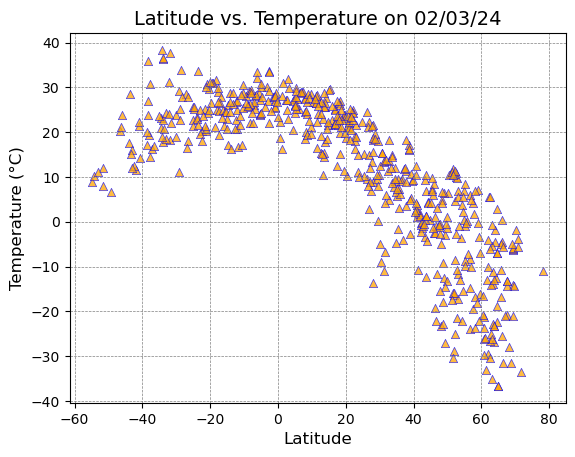

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],
            edgecolor="blue",
            linewidths=0.5,
            marker="^",
            alpha=0.75,
            label="Cities",
            color='orange') 

# Incorporate the other graph properties with some customization
plt.title("Latitude vs. Temperature on %s" % time.strftime("%x"), fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.savefig("../output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

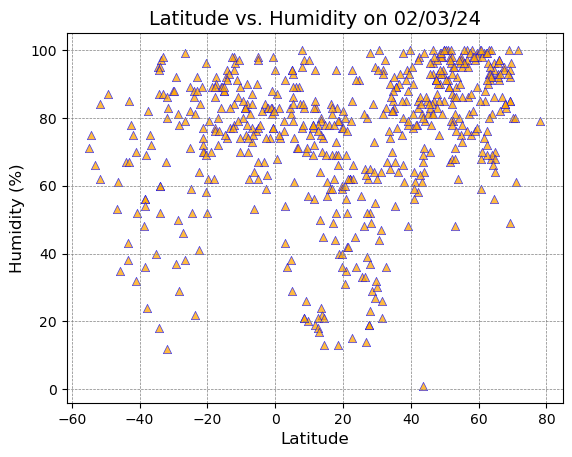

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],
            edgecolor="blue",
            linewidths=0.5,
            marker="^",
            alpha=0.75,
            label="Cities",
            color='orange') 

# Incorporate the other graph properties with some customization
plt.title("Latitude vs. Humidity on %s" % time.strftime("%x"), fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.savefig("../output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

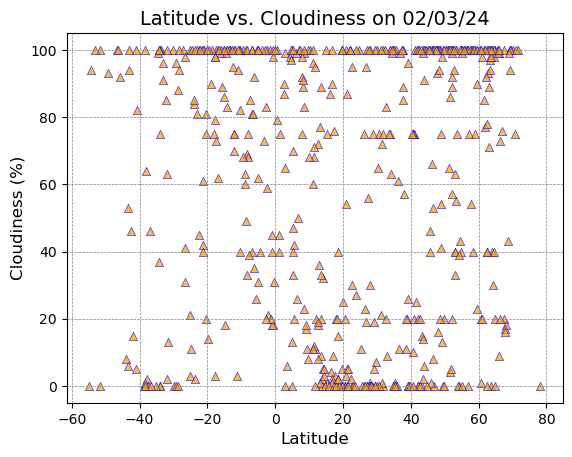

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],
            edgecolor="blue",
            linewidths=0.5,
            marker="^",
            alpha=0.75,
            label="Cities",
            color='orange') 

# Incorporate the other graph properties with some customization
plt.title("Latitude vs. Cloudiness on %s" % time.strftime("%x"), fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.savefig("../output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

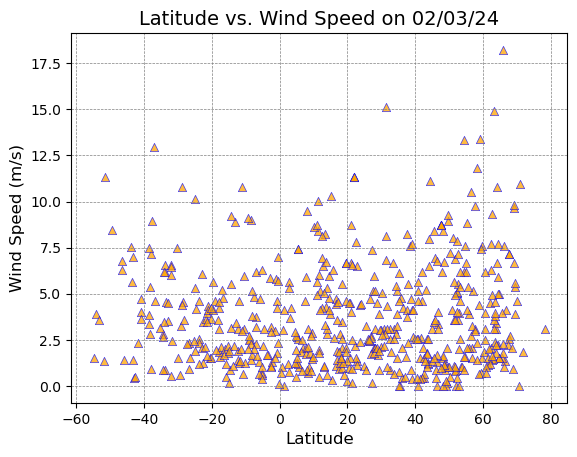

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],
            edgecolor="blue",
            linewidths=0.5,
            marker="^",
            alpha=0.75,
            label="Cities",
            color='orange') 

# Incorporate the other graph properties with some customization
plt.title("Latitude vs. Wind Speed on %s" % time.strftime("%x"), fontsize=14)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.savefig("../output_data/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def create_plot(x_values, y_values, x_label, y_label, title, text_coordinates):

    # Calculate the linear regression parameters
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate the regression values
    regress_values = x_values * slope + intercept
    
    # Line equation string
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")  # Plot the regression line
    
    # Annotate the plot with the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show R squared value
    print(f"The r-squared is: {r_value**2:.2f}")
    
    # Show plot
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,23.73,60,100,6.69,US,1707013020
1,kapa'a,22.0752,-159.3190,24.99,62,100,11.32,US,1707013000
2,isafjordur,66.0755,-23.1240,-4.44,91,99,7.60,IS,1707013020
4,pandan,14.0453,124.1694,27.67,74,32,2.83,PH,1707013020
7,udachny,66.4167,112.4000,-31.45,82,73,1.35,RU,1707013020


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,7.92,84,100,1.35,CL,1707013020
5,papatowai,-46.5619,169.4708,20.16,53,100,6.80,NZ,1707013020
6,invercargill,-46.4000,168.3500,21.12,61,100,6.26,NZ,1707013020
12,sidney,-33.8679,151.2073,36.29,60,0,6.17,AU,1707013001
13,hermanus,-34.4187,19.2345,23.22,87,37,2.79,ZA,1707013021


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.72


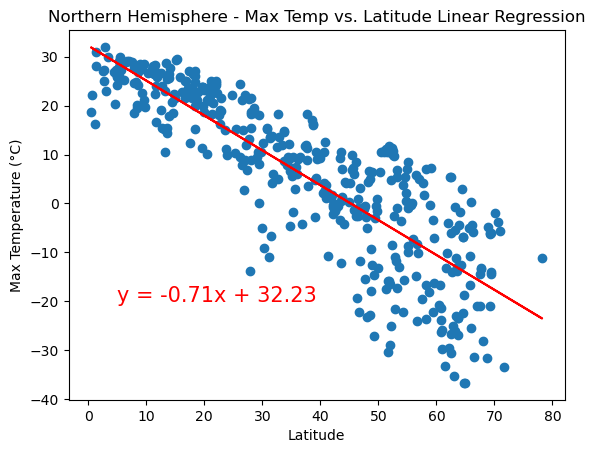

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

x_label = "Latitude"
y_label = "Max Temperature (°C)"
title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"

text_coordinates = (5, -20)
create_plot(x_values, y_values, x_label, y_label, title, text_coordinates)

The r-squared is: 0.25


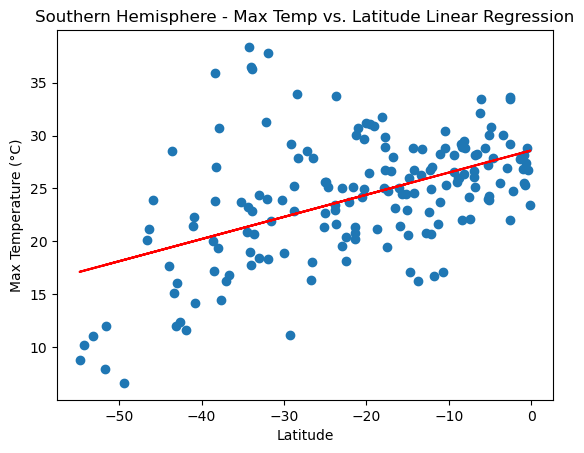

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

x_label = "Latitude"
y_label = "Max Temperature (°C)"
title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"

text_coordinates = (5, -20)
create_plot(x_values, y_values, x_label, y_label, title, text_coordinates)

**Discussion about the linear relationship:** The Northern Hemisphere shows a strong linear relationship between latitude and max temperature, with an r-squared of 0.74, indicating that latitude significantly predicts temperature. Conversely, the Southern Hemisphere's r-squared of 0.19 suggests a much weaker correlation, implying other factors may more strongly influence temperature variations there.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.18


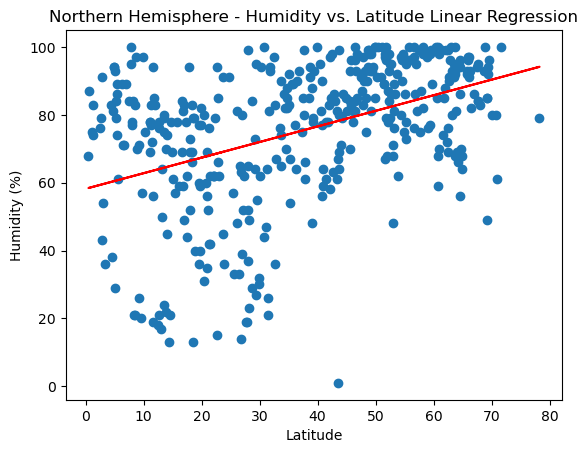

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

x_label = "Latitude"
y_label = "Humidity (%)"
title = "Northern Hemisphere - Humidity vs. Latitude Linear Regression"

text_coordinates = (5, -20)
create_plot(x_values, y_values, x_label, y_label, title, text_coordinates)

The r-squared is: 0.13


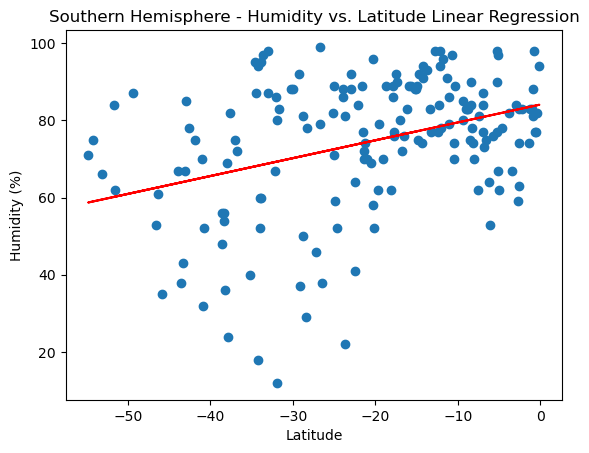

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

x_label = "Latitude"
y_label = "Humidity (%)"
title = "Southern Hemisphere - Humidity vs. Latitude Linear Regression"

text_coordinates = (5, -20)
create_plot(x_values, y_values, x_label, y_label, title, text_coordinates)

**Discussion about the linear relationship:** For humidity, both the Northern and Southern Hemispheres exhibit low r-squared values of 0.13 and 0.15, respectively. This indicates a weak linear relationship between latitude and humidity in both hemispheres, suggesting that latitude is not a strong predictor of humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.07


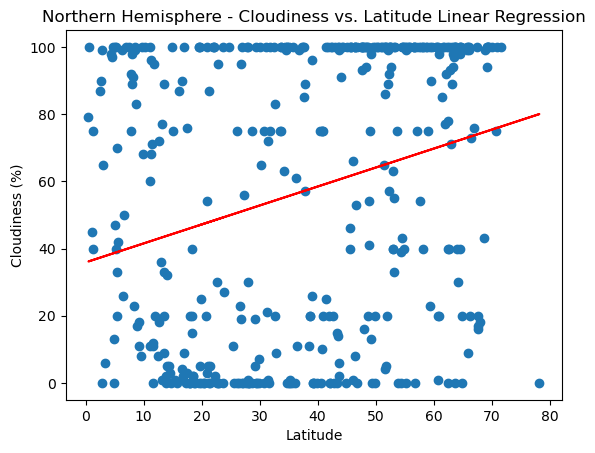

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

x_label = "Latitude"
y_label = "Cloudiness (%)"
title = "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression"

text_coordinates = (5, -20)
create_plot(x_values, y_values, x_label, y_label, title, text_coordinates)

The r-squared is: 0.03


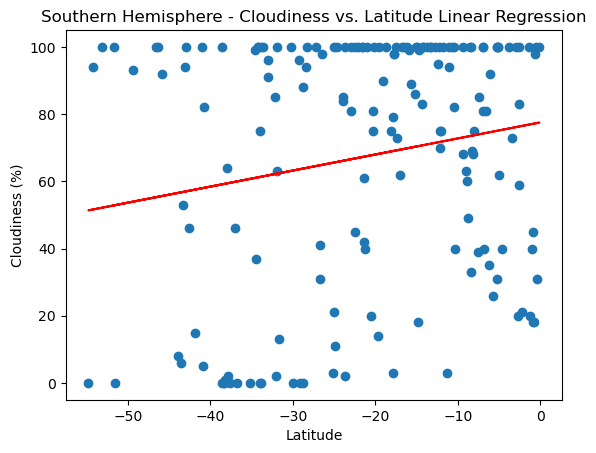

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

x_label = "Latitude"
y_label = "Cloudiness (%)"
title = "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression"

text_coordinates = (5, -20)
create_plot(x_values, y_values, x_label, y_label, title, text_coordinates)

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.01


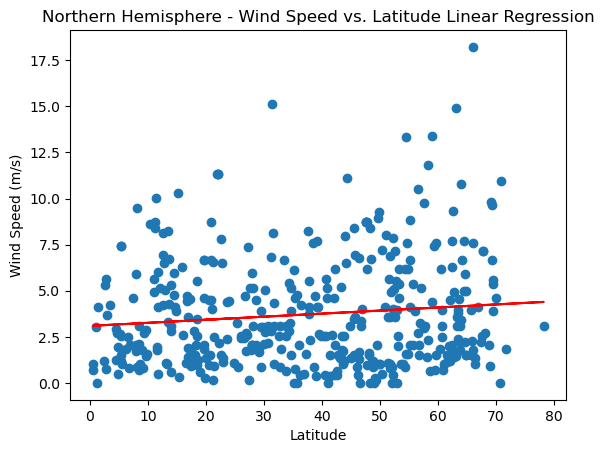

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

x_label = "Latitude"
y_label = "Wind Speed (m/s)"
title = "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression"

text_coordinates = (5, -20)
create_plot(x_values, y_values, x_label, y_label, title, text_coordinates)

The r-squared is: 0.05


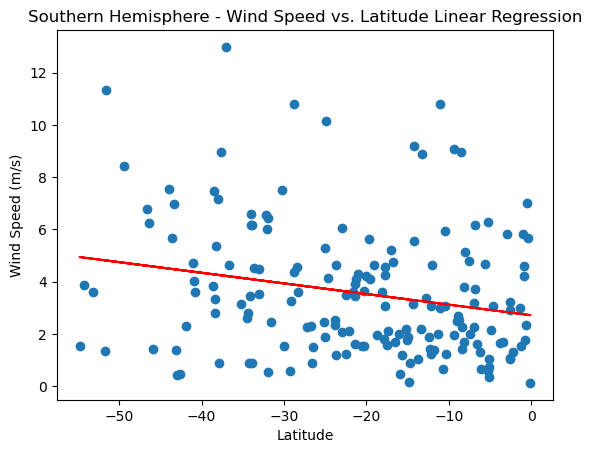

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

x_label = "Latitude"
y_label = "Wind Speed (m/s)"
title = "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression"

text_coordinates = (5, -20)
create_plot(x_values, y_values, x_label, y_label, title, text_coordinates)